In [174]:
import numpy as np
import random
from fractions import Fraction
from Commands import dec2int, bernoulli, control, order_parameter
from MonteCarloCommands import energy, boltzmann_probability
import matplotlib.pyplot as plt


In [175]:
length = 1000
random.seed(10)
times = 1
low_prob = 00
high_prob = 00 + 1
Beta = 1
K = 1 
num_chains = 2
spacing = 10
num_points = int(np.ceil((high_prob-low_prob)/spacing))

In [176]:
if (length**2//2) % 10 == 0:
    time_size = (length//2) +1 
    delta = np.zeros((times, num_points, time_size, 2), dtype=float) # samples every 200 instances, delta[iterations, probabilities, sample through time,  chains per iteration]
    take2 = np.zeros((times,num_points, time_size,2), dtype=float)
else:
    time_size = (length//2) +2+10
    delta = np.zeros((times, num_points, time_size, 2), dtype=float)
    take2 = np.zeros((times,num_points, time_size,2), dtype=float)
num_array = np.zeros((times,num_points, 2*num_chains, time_size), dtype=float)
# 1st case is to eliminate an extra empty array indice 

In [177]:

for k in range(0, times):
    j = 0
    #print(k)
    
    # Probability of choosing the Control Map
    for prob in range(low_prob, high_prob, spacing):
        # initialize chains
        rep1 = random.getrandbits(length) #this works correctly, can verify with the print
        rep1a = rep1 ^(1<<(length//2))
        rep2 = random.getrandbits(length)
        rep2a = rep2 ^(1<<(length//2))
        #print(bin(rep1), bin(rep1a))
        num_array[k, prob//spacing,0,0] = rep1
        num_array[k, prob//spacing,1,0] = rep1a
        num_array[k, prob//spacing,2,0] = rep2
        num_array[k, prob//spacing,3,0] = rep2a
        delta[k, prob//spacing, 0, 0] = np.abs(bin(rep1^rep1a).count('1'))
        delta[k, prob//spacing, 0, 1] = np.abs(bin(rep2^rep2a).count('1'))
        take2[k, prob//spacing, 0, 0] = np.abs((rep1-rep1a))
        take2[k, prob//spacing, 0, 1] = np.abs((rep2-rep2a))
        for i in range((time_size)):
            if random.random() > (float(prob) / 100):
                rep1 = bernoulli(rep1, length)
                rep1a = bernoulli(rep1a, length)
            else:
                rep1 = control(rep1, length)
                rep1a = control(rep1a, length)
            if random.random() > (float(prob)/100):
                rep2 = bernoulli(rep2, length)
                rep2a = bernoulli(rep2a, length)
            else:
                rep2 = control(rep2, length)
                rep2a = control(rep2a, length)
            if (i%1) == 0 and i!=0:
                delta[k, prob//spacing, i,  0] = np.abs(bin(rep1^rep1a).count('1'))
                delta[k, prob//spacing, i,  1] = np.abs(bin(rep2^rep2a).count('1'))
                take2[k, prob//spacing, i, 0] = np.abs((rep1-rep1a))/take2[k,prob//spacing,0,0]
                take2[k, prob//spacing, i, 1] = np.abs((rep2-rep2a))/take2[k,prob//spacing,0,1]
                num_array[k, prob//spacing,0,i] = rep1
                num_array[k, prob//spacing,1,i] = rep1a
                num_array[k, prob//spacing,2,i] = rep2
                num_array[k, prob//spacing,3,i] = rep2a
            #print(rep1,rep1a)
            #if random.random() > (float(prob)/100):
            #    rep3 = bernoulli(rep3, length)
            #else:
            #    rep3 = control(rep3, length)
            #rep3 = int(lattice[2], base=2)
        
        j += 1
        #print(j, number, rep, record[j])
        delta[k, prob//spacing,-1, 0] = np.abs(bin(rep1^rep1a).count('1'))
        delta[k, prob//spacing,-1, 1] = np.abs(bin(rep2^rep2a).count('1'))   
        take2[k, prob//spacing,-1, 0] = np.abs((rep1-rep1a))/take2[k,prob//spacing,0,0]
        take2[k, prob//spacing, -1, 1] = np.abs((rep2-rep2a)) /take2[k,prob//spacing,0,1]
        take2[k,prob//spacing,0,:]=1


In [178]:
print(np.shape(delta))
print(time_size)


(1, 1, 501, 2)
501


Text(0.5, 1.0, ' Evolution of Chaos for Chain 2 $\\beta$=1')

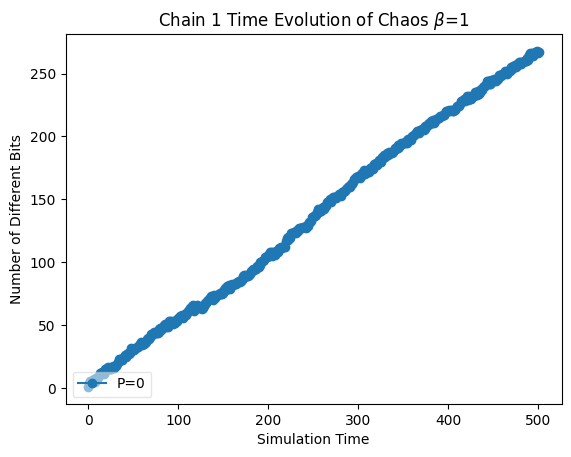

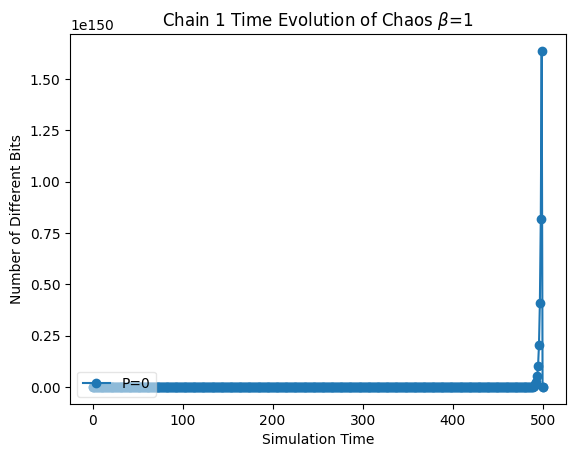

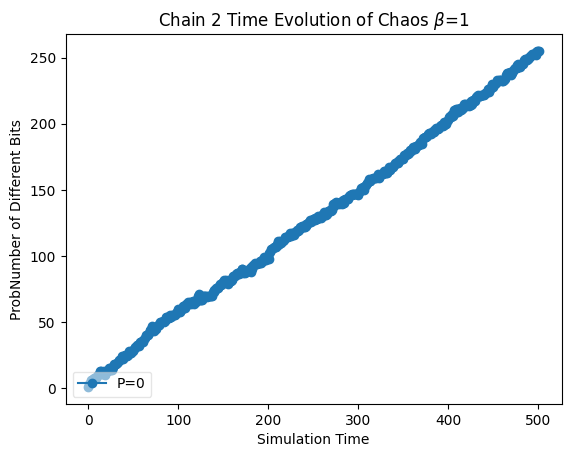

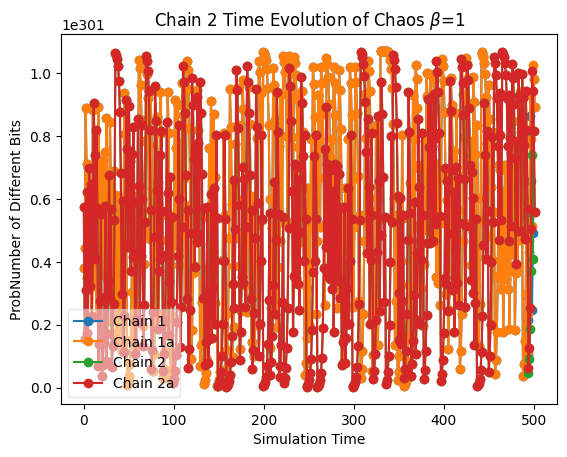

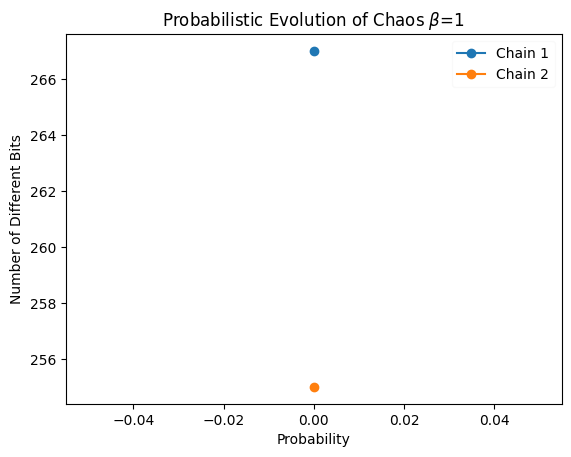

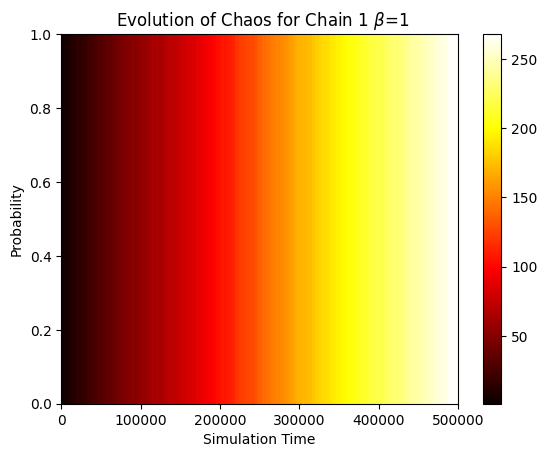

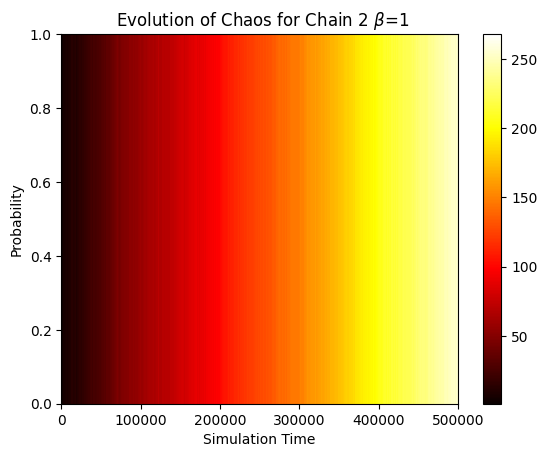

In [179]:
fig, ax = plt.subplots() #time evolution diff
for i in range(num_points):
    ax.plot( np.linspace(0,time_size,time_size), np.sum(delta, axis = 0)[i,:,0]/times, marker='o', label='P=' +str(i*spacing))
ax.legend(fancybox=True, framealpha=0.5, loc= 'lower left')
ax.set_xlabel(r'Simulation Time')
ax.set_ylabel(r'Number of Different Bits')
ax.set_title(r'Chain 1 Time Evolution of Chaos $\beta$=' + str(Beta))

fig, ax = plt.subplots() #time evolution diff
for i in range(num_points):
    ax.plot( np.linspace(0,time_size,time_size), np.sum(take2, axis = 0)[i,:,0]/times, marker='o', label='P=' +str(i*spacing))
ax.legend(fancybox=True, framealpha=0.5, loc= 'lower left')
ax.set_xlabel(r'Simulation Time')
ax.set_ylabel(r'Number of Different Bits')
ax.set_title(r'Chain 1 Time Evolution of Chaos $\beta$=' + str(Beta))

fig, ax = plt.subplots() #time evolution Chain 2 diff
for i in range(num_points):
    ax.plot( np.linspace(0,time_size, time_size), np.sum(delta, axis = 0)[i,:,1]/times, marker='o', label='P=' +str(i*spacing))
ax.legend( fancybox=True, framealpha=0.5, loc= 'lower left')
ax.set_xlabel(r'Simulation Time')
ax.set_ylabel(r'ProbNumber of Different Bits')
ax.set_title(r'Chain 2 Time Evolution of Chaos $\beta$=' + str(Beta))

fig, ax = plt.subplots() #time evolution Chain 2
ax.plot( np.linspace(0,time_size, time_size), num_array[0,0,0,:], marker='o', label='Chain 1')
ax.plot( np.linspace(0,time_size, time_size), num_array[0,0,1,:], marker='o', label='Chain 1a')
ax.plot( np.linspace(0,time_size, time_size), num_array[0,0,2,:], marker='o', label='Chain 2')
ax.plot( np.linspace(0,time_size, time_size), num_array[0,0,3,:], marker='o', label='Chain 2a')
ax.legend( fancybox=True, framealpha=0.5, loc= 'lower left')
ax.set_xlabel(r'Simulation Time')
ax.set_ylabel(r'ProbNumber of Different Bits')
ax.set_title(r'Chain 2 Time Evolution of Chaos $\beta$=' + str(Beta))


fig, ax = plt.subplots() #probabilistic evolution
ax.plot( np.linspace(low_prob,high_prob, num_points), np.sum(delta, axis = 0)[:,-1,0]/times, marker='o')
ax.plot( np.linspace(low_prob,high_prob, num_points), np.sum(delta, axis = 0)[:,-1,1]/times, marker='o')
ax.legend(["Chain 1", "Chain 2"], fancybox=True, framealpha=0.1, loc= 'best')
ax.set_xlabel(r'Probability')
ax.set_ylabel(r'Number of Different Bits')
ax.set_title(r'Probabilistic Evolution of Chaos $\beta$=' + str(Beta))

fig,ax = plt.subplots()
rec1 = ax.imshow(np.average(delta, axis=0)[:,:,0], cmap='hot',interpolation = 'nearest', origin='lower', extent=[0,(length**2)//2,low_prob,high_prob],vmin=np.min(np.average(delta, axis=0)), vmax=np.max(np.average(delta, axis=0)), aspect='auto')
fig.colorbar(rec1, ax=ax, location ='right', shrink = 1)
ax.set_xlabel(r'Simulation Time')
ax.set_ylabel(r'Probability')
ax.set_title(r' Evolution of Chaos for Chain 1 $\beta$=' + str(Beta))

fig,ax = plt.subplots()
rec1 = ax.imshow(np.average(delta, axis=0)[:,:,1], cmap='hot',interpolation = 'nearest', origin='lower', extent=[0,(length**2)//2,low_prob,high_prob],vmin=np.min(np.average(delta, axis=0)), vmax=np.max(np.average(delta, axis=0)), aspect='auto')
fig.colorbar(rec1, ax=ax, location ='right', shrink = 1)
ax.set_xlabel(r'Simulation Time')
ax.set_ylabel(r'Probability')
ax.set_title(r' Evolution of Chaos for Chain 2 $\beta$=' + str(Beta))


[0. 0.]
0.6945390423682987 0.6931471805599453


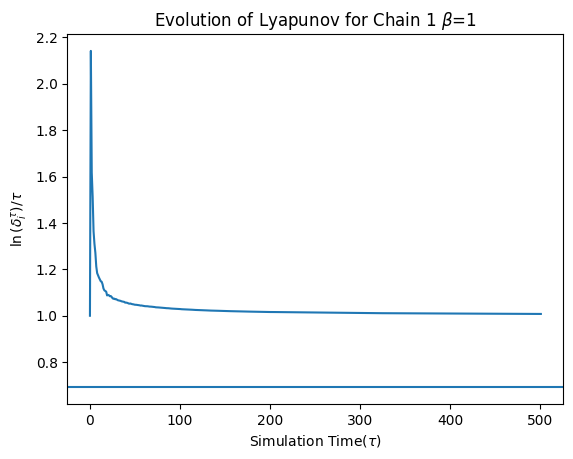

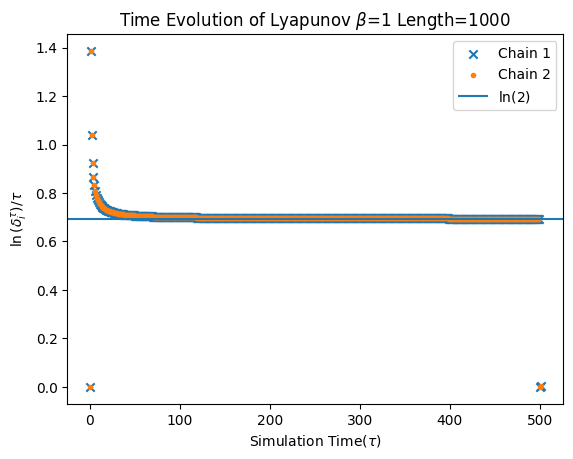

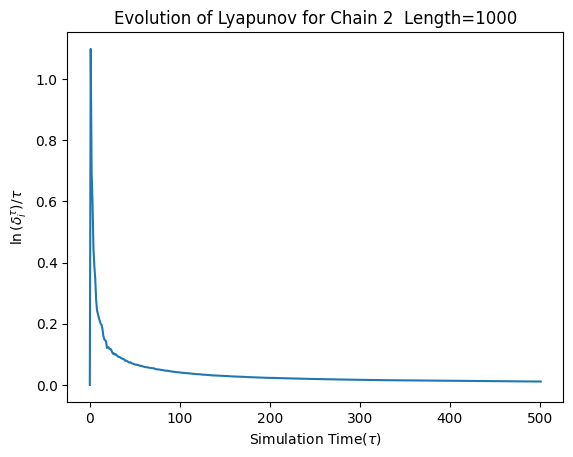

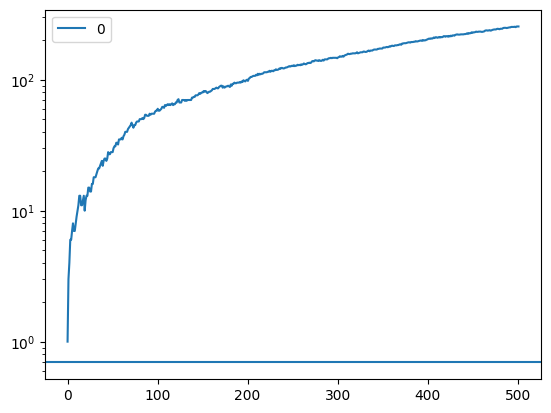

In [180]:
Average = np.average(delta, axis =0)
Log = np.log(Average)
for i in range(1, time_size):
    Log[:,i,:] = Log[:,i,:]/i

Average2 = np.average(take2, axis =0)
Log2 = np.log(Average2)
for i in range(1, time_size):
    Log2[:,i,:] = Log2[:,i,:]/i
print(Log2[-1,0,:])
fig, ax = plt.subplots()
for i in range(num_points):
    ax.plot(np.linspace(0,time_size, time_size), 2**Log[i,:,1])
ax.set_xlabel(r'Simulation Time($\tau$)')
ax.set_ylabel(r'$\ln{(\delta_{i}^\tau)}/\tau$')
ax.set_title(r'Evolution of Lyapunov for Chain 1 $\beta$=' + str(Beta))
plt.axhline(np.log(2))

fig, ax = plt.subplots()
for i in range(num_points):
    ax.scatter(np.linspace(0,time_size, time_size-0), Log2[i,0:,1], marker='x',label='Chain 1')
    ax.scatter(np.linspace(0,time_size, time_size-0), Log2[i,0:,1], marker='.', label='Chain 2')
ax.set_xlabel(r'Simulation Time($\tau$)')
ax.set_ylabel(r'$\ln{(\delta_{i}^\tau)}/\tau$')
ax.set_title(r'Time Evolution of Lyapunov $\beta$=' + str(Beta)+' Length=' +str(length))
plt.axhline(np.log(2), label=r'$\ln(2)$')
ax.legend()

fig, ax = plt.subplots()
for i in range(num_points):
    ax.plot(np.linspace(0,time_size, time_size), Log[i,:,1])
ax.set_xlabel(r'Simulation Time($\tau$)')
ax.set_ylabel(r'$\ln{(\delta_{i}^\tau)}/\tau$')
ax.set_title(r'Evolution of Lyapunov for Chain 2 ' +' Length=' +str(length))
fig, ax = plt.subplots()
for i in range(num_points):
    ax.plot(np.linspace(0,time_size, time_size), Average[i,:,1], label=str(i*spacing))
    ax.legend()
#ax.set_xlim(0, (length**2)//2)
ax.set_yscale('log')
plt.axhline(np.log(2))

print(Log2[0,length//2-2,1], np.log(2))